In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.stats import pearsonr, spearmanr
import math
import plotly.io as pio
pio.renderers.default = "plotly_mimetype"

# Seed for reproducibility
np.random.seed(42)

# Number of datapoints for each scatter plot
n_points = 400

# Function to generate synthetic data for brain volume vs. cognitive performance
def generate_synthetic_data(volume_mean, volume_std, score_mean, score_std, correlation, n_points):
    volume = np.random.normal(volume_mean, volume_std, n_points)
    volume_jitter = np.random.normal(0, volume_std * 1.5, n_points)  # Add jitter to volume
    noise = np.random.normal(0, score_std * 20.5, n_points)  # Increase noise for jitter in score
    score = score_mean + -1* correlation * (volume - volume_mean) + noise
    return volume + volume_jitter, score

# Function to generate additional metrics
def generate_additional_metrics(volume, score, volume_std, score_std, n_points):
    # Hypothetical Brain Density: Based on volume with added noise
    density = volume / (volume_std * np.random.uniform(0.8, 1.2, n_points))
    noise = np.random.normal(0, score_std * 0.01, n_points)  # Increase noise for jitter in score
    
    # Hypothetical Neural Efficiency: Positively correlated with score but with noise
    efficiency = score / (score_std * np.random.uniform(1.2, 11.7, n_points)) + noise
    
    return density, efficiency

# Generate synthetic data for 10 scatter plots
data_dict = {}

# Scatter plot 1: Hippocampus Volume vs. Memory Score
data_dict["Amygdala_Emotion"] = generate_synthetic_data(2350, 100, 45, 10, 0.18, n_points)

df_dict = {key: pd.DataFrame({'Volume': value[0], 'Score': value[1]}) for key, value in data_dict.items()}

# Apply additional metrics to all regions
for key, df in df_dict.items():
    volume_std = np.std(df['Volume'])
    score_std = np.std(df['Score'])
    
    # Generate new metrics for Brain Density and Neural Efficiency
    density, efficiency = generate_additional_metrics(df['Volume'], df['Score'], volume_std, score_std, n_points)
    
    # Add the new metrics to the DataFrame
    df['Density'] = density
    df['Efficiency'] = efficiency

def plot_correlation(df_dict, key, x_col, y_col, title_prefix, color='blue', marker_size=10, marker_opacity=0.7):
    df = df_dict[key]
    
    # Calculate Spearman correlation
    corr, _ = pearsonr(df[x_col], df[y_col])
    
    # Create scatter plot with customized marker colors, size, and opacity
    fig = px.scatter(
        df, 
        x=x_col, 
        y=y_col, 
        title=f'{title_prefix} (Pearson: {corr:.2f})', 
        trendline='ols',
        color_discrete_sequence=[color],  # Custom marker color
        template="plotly_dark",
        marginal_x="histogram", 
        marginal_y="rug",
    )
    
    # Update marker style
    # fig.update_traces(marker=dict(size=marker_size, opacity=marker_opacity))
    
    # Update figure layout
    fig.update_layout(height=600)
    
    return fig


In [4]:
#| label: fig0cell

alinx = [0.30000000000000016,
 0.10000000000000012,
 -0.09999999999999992,
 -0.2999999999999998,
 -0.4999999999999998,
 -0.5999999999999999]
aliny = [0.5196152422706632,
 0.3464101615137755,
 0.17320508075688784,
 1.2246467991473532e-16,
 -0.17320508075688756,
 -0.3464101615137753]

fig = px.scatter(x=alinx, y=aliny, title='Alienarity index', labels={'x':'X-axis', 'y':'Y-axis'},template="plotly_dark")
fig.update_traces(marker=dict(size=10, opacity=1,color='yellow'))
fig.show()

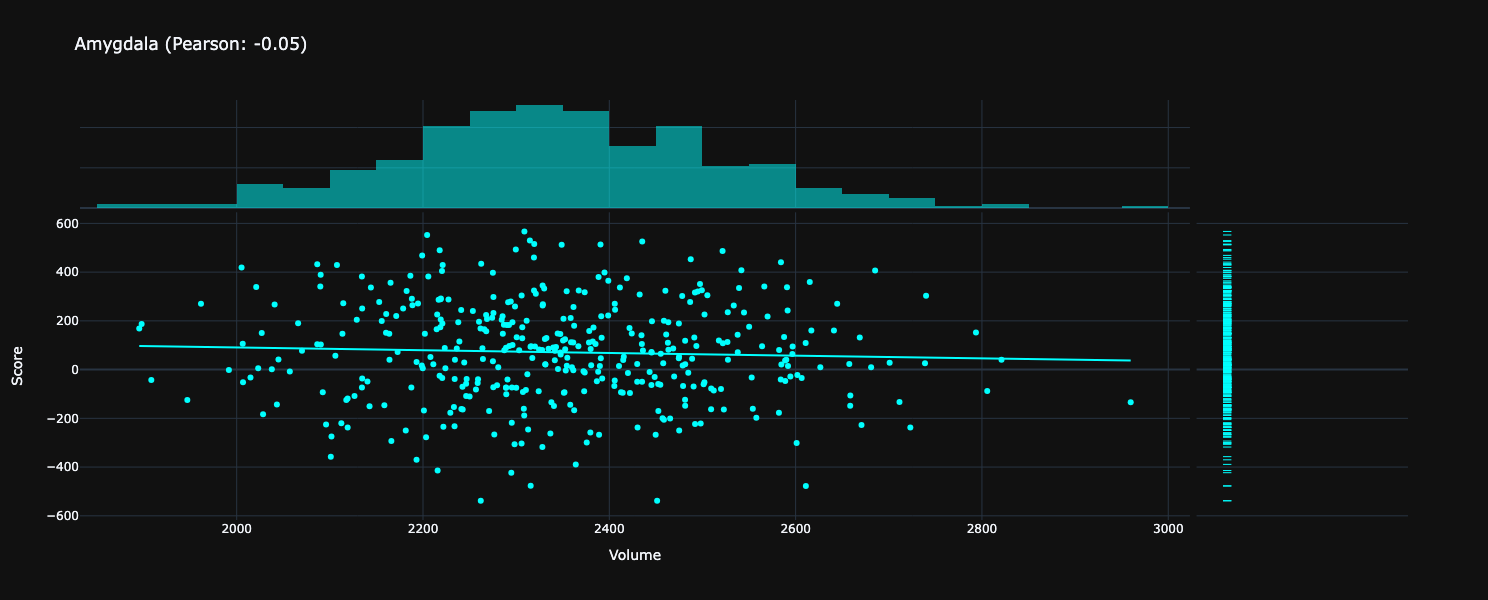

In [62]:
#| label: fig1cell 

fig1 = plot_correlation(df_dict, "Amygdala_Emotion", 'Volume', 'Score', 'Amygdala', color='cyan', marker_size=10, marker_opacity=0.7)
fig1.show()

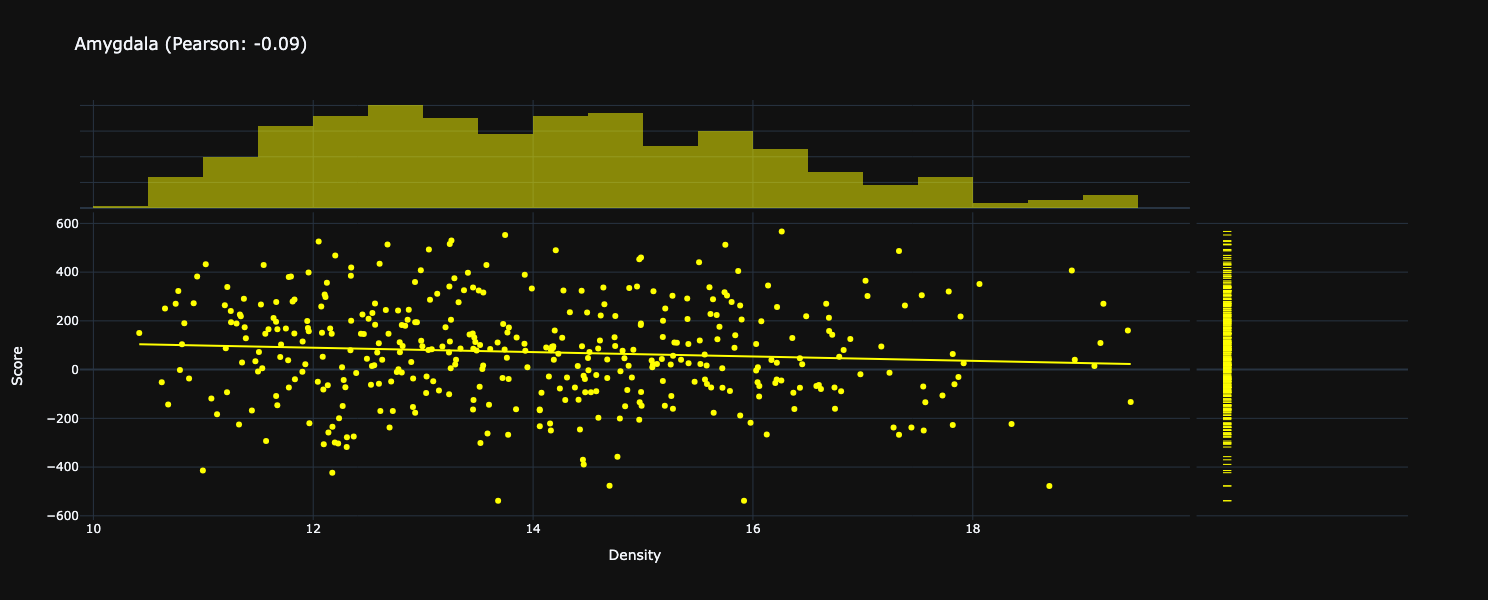

In [63]:
#| label: fig2cell 

fig2 = plot_correlation(df_dict, "Amygdala_Emotion", 'Density', 'Score', 'Amygdala', color='yellow', marker_size=10, marker_opacity=0.7)
fig2.show()

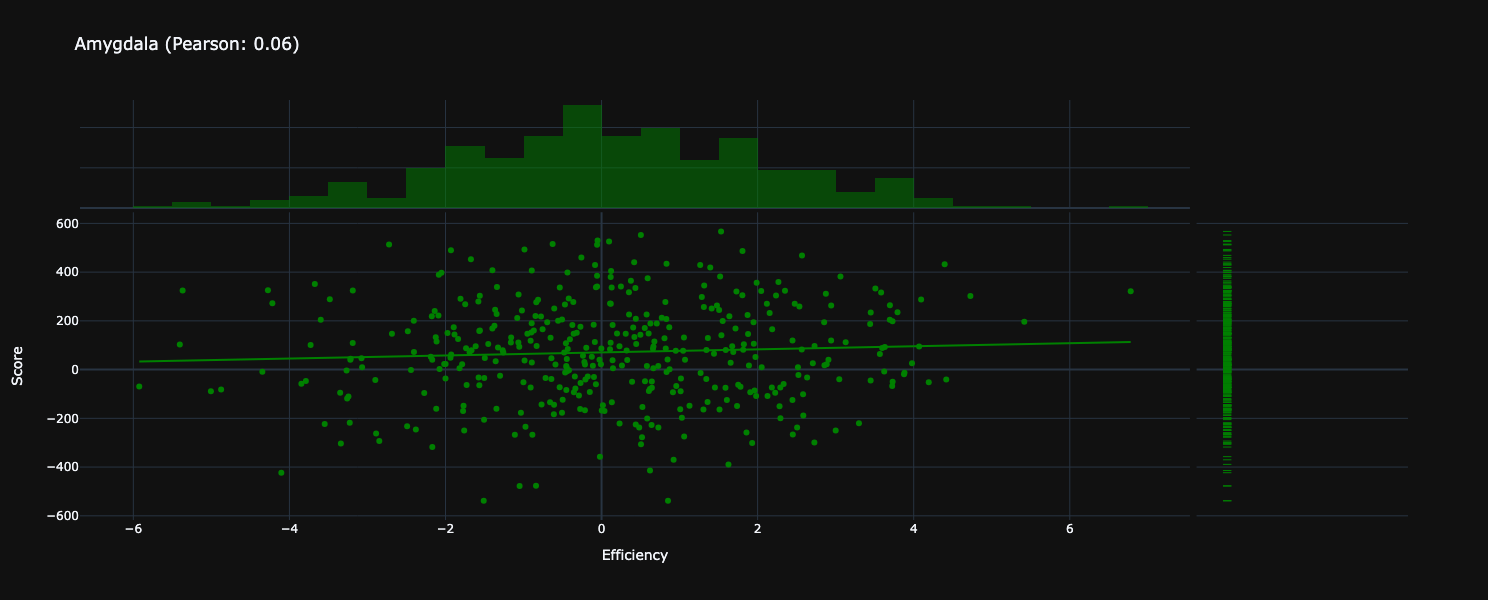

In [64]:
#| label: fig3cell

fig2 = plot_correlation(df_dict, "Amygdala_Emotion", 'Efficiency', 'Score', 'Amygdala', color="green", marker_size=10, marker_opacity=0.7)
fig2.show()
